# The Experiment

Train a hanful of neural networks to spit out color chanels based on coordinates

In [1]:
# libraries used
import numpy as np
from PIL import Image
import network as nn
from random import shuffle
print(nn.__doc__)

netwprk.py
the main module that handles the neural networks
utilizes numpy for now



## The Data

![DataSet](DataSet.png)

In [2]:
#importing the image into a dataset
imobj = Image.open(".\\Dataset.png")
imarr = np.asarray(imobj)
print(imarr.shape)
dataset = []
for x in range(imarr.shape[0]):
    for y in range(imarr.shape[1]):
        coords = (x,y)
        color = []
        for chan in range(imarr.shape[2]):
            color.append(imarr[x][y][chan]/255)
        color=tuple(color)
        pair = (coords,color)
        dataset.append(pair)
print(len(dataset))
print(imarr.shape[0]*imarr.shape[1])
shuffle(dataset)
# use about 20% of dataset for testing, 80% for training
test_size = len(dataset)//5
print(dataset[0])
train = dataset[:-test_size]
test = dataset[-test_size:]
print(len(train),len(test))

(225, 400, 3)
90000
90000
((157, 14), (1.0, 0.4980392156862745, 0.15294117647058825))
72000 18000


In [3]:
# a function to reconstruct the image via the net
def NetImage(net):
    if type(net) is not nn.NeuralNet:
        raise TypeError("Unexpected type")
    newimarr = np.zeros(imarr.shape,dtype=np.uint8)
    for x in range(imarr.shape[0]):
        for y in range(imarr.shape[1]):
            coords = (x,y)
            color = net.Classify(coords)
            for chan in range(imarr.shape[2]):
                chancol = 0
                try:
                    chancol = round(color[chan]*256)
                except:
                    chancol = 0
                if chancol < 0:
                    chancol = 0
                elif chancol > 255:
                    chancol = 255
                newimarr[x][y][chan] = chancol
    return Image.fromarray(newimarr)

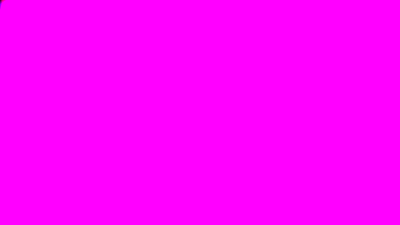

In [4]:
# testing the new thing
fakenet = nn.NeuralNet(2,3)
fakeim = NetImage(fakenet)
display(fakeim)

## The Networks

In [5]:
# some global facts for net building and training
inps = 2
outs = 3
epochs = 10
alpha = 0.1

Reference

![ref](netdrawings\networks-Ref.png)

### Net 1

Just a collection of linear regressors

![net1](netdrawings\networks-net1.png)

In [6]:
# implementation and training
net1 = nn.NeuralNet(inps,outs)
nn.TrainNet(net1,train,epochs//2,alpha)
nn.TrainNet(net1,train,epochs//2,alpha)

Begining training


e:\Git Clones\Linear-Output-NeuralNet\network.py:93: RuntimeWarning: overflow encountered in matmul
  n_array = np.matmul(p_layer,self._thetas[layer])
e:\Git Clones\Linear-Output-NeuralNet\network.py:159: RuntimeWarning: overflow encountered in matmul
  delta_theta = np.matmul(actT,deriM)
e:\Git Clones\Linear-Output-NeuralNet\network.py:175: RuntimeWarning: invalid value encountered in add
  self._thetas[i] += alpha*delta_thetas[i]


Done in 0.0 minutes and 6.82 seconds
Begining training
Done in 0.0 minutes and 6.83 seconds


In [7]:
net1_cost = nn.TestNet(net1,test)
print(net1_cost)

nan


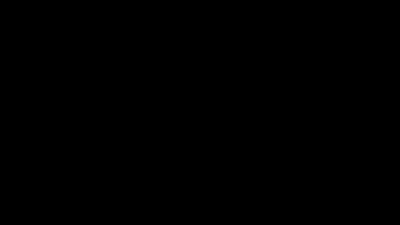

In [8]:
net1_im = NetImage(net1)
display(net1_im)
net1_im.save(".\\results\\net1.png")

In [9]:
for theta in net1._thetas:
    print(theta)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


### Net 2

Just a collection of linear regressors feeding into more linear regressors

![net1](netdrawings\networks-net2.png)

In [10]:
# implementation and training
net2 = nn.NeuralNet(inps,outs,[5],[nn.LINEAR,nn.LINEAR])
nn.TrainNet(net2,train,epochs,alpha)

Begining training


e:\Git Clones\Linear-Output-NeuralNet\network.py:93: RuntimeWarning: invalid value encountered in matmul
  n_array = np.matmul(p_layer,self._thetas[layer])


Done in 0.0 minutes and 26.90 seconds


In [11]:
net2_cost = nn.TestNet(net2,test)
print(net2_cost)

nan


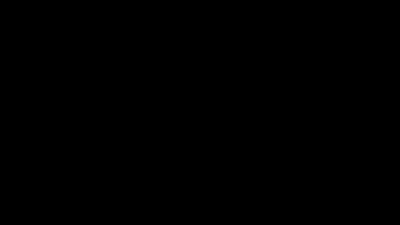

In [12]:
net2_im = NetImage(net2)
display(net2_im)
net2_im.save(".\\results\\net2.png")

### Net 3

A collection of linear regressors fed by logistic nodes

![net1](netdrawings\networks-net3.png)

In [13]:
# implementation and training
net3 = nn.NeuralNet(inps,outs,[5],[nn.SIGMOID,nn.LINEAR])
nn.TrainNet(net3,train,epochs,alpha)

Begining training
Done in 0.0 minutes and 30.65 seconds


In [14]:
net3_cost = nn.TestNet(net3,test)
print(net3_cost)

0.1285968682984867


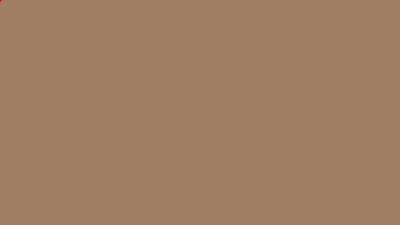

In [15]:
net3_im = NetImage(net3)
display(net3_im)
net3_im.save(".\\results\\net3.png")